In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from dataset_unpacking_utility import prepare_dataset_mat, prepare_dataset_fashion_mnist, prepare_dataset_mnist

_, _, _, y_test = prepare_dataset_mnist()
reconstruction_error = np.load('SVHN_pipeline_weights_test_recon_error.npy')
del _

def boxplots_each_label(reconstruction_errors, labels_dataset):
    a = np.stack((labels_dataset,reconstruction_errors),axis=-1)
    
    df = pd.DataFrame(a)
    df.columns = ['Label', 'Reconstruction_error']
    df.index = np.arange(1, len(df)+1)
    df['Label'].astype(int)
    
    #data = pd.concat([df['SalePrice'], df[var]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    
    fig = sb.boxplot(x='Label', y='Reconstruction_error', data=df)
    #fig = sb.stripplot(x='Label', y='Reconstruction_error', data=df, color="orange", jitter=0.2, size=2.5)
    
    fig.axis(ymin=0, ymax=reconstruction_errors[np.argmax(reconstruction_errors)]+reconstruction_errors[np.argmax(reconstruction_errors)]*0.1)

    plt.title("Boxplot with jitter", loc="left")

    
    return

boxplots_each_label(reconstruction_error, y_test)


Using TensorFlow backend.


(9959, 28, 28, 1)


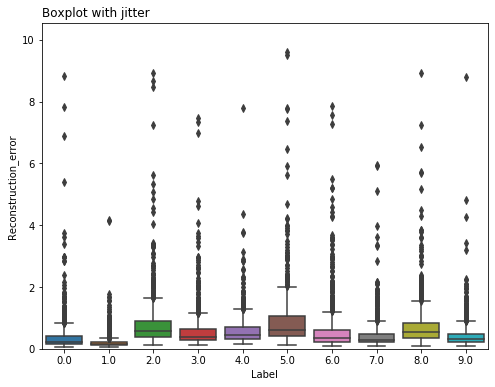

In [3]:
outliers = []
for i in range(len(reconstruction_error)):
    if reconstruction_error[i] < 10:
        outliers.append(i)

import numpy as np
from visualizing_images import visualize_images #does pyplot and makes a grid of data

#Data unpacking block
from dataset_unpacking_utility import prepare_dataset_mat, prepare_dataset_fashion_mnist, prepare_dataset_mnist

X_train, X_test, y_train, y_test = prepare_dataset_mnist()
reconstructed_images = np.load('SVHN_pipeline_weights_test_reconstructed_images.npy')


relevant_x_test = []
relevant_reconstructed = []
relevant_recon_y = []
relevant_errors = []
for i in outliers:
    relevant_x_test.append(X_test[i])
    relevant_reconstructed.append(reconstructed_images[i])
    relevant_recon_y.append(y_test[i])
    relevant_errors.append(reconstruction_error[i])
    
relevant_x_test = np.array(relevant_x_test)
relevant_reconstructed = np.array(relevant_reconstructed)
relevant_recon_y = np.array(relevant_recon_y)
relevant_errors = np.array(relevant_errors)
print(relevant_x_test.shape)
    
#print(visualize_images(relevant_x_test, relevant_recon_y, 1))
#print(visualize_images(relevant_reconstructed, relevant_recon_y, 1))
boxplots_each_label(relevant_errors, relevant_recon_y)
    

In [30]:
#Data unpacking block
from dataset_unpacking_utility import prepare_dataset_mat, prepare_dataset_fashion_mnist, prepare_dataset_mnist

X_train, X_test, y_train, y_test = prepare_dataset_fashion_mnist()
reconstructed_images = np.load('C:\\Users\\31687\\Desktop\\VAE-SVHN-master\\Automated\\dataset_0_weights_test\\dataset_0_weights_test_ndim_10_filters_64_reconstructed_images.npy')


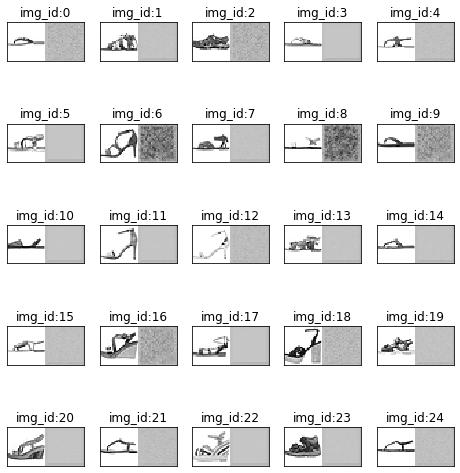

None


In [32]:
#Visualize X_train, X_test or reconstructed images. Necessary format = (N,width,height)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from Label_index_utility import label_indexer #try label_indexer(y_test).shape to see what happens. (number_labels,observations)

def visualize_images_outliers(img_data1,img_data2, label_data, label_number):

    
    w = img_data1.shape[1]
    h = img_data1.shape[2]
    fig = plt.figure(figsize=(8, 9)) #basic setting = (9,13)
    columns = 5 #basic setting = 4
    rows = 5 #basic setting = 
    
    ## prep (x,y) for extra plotting
    #xs = np.linspace(0, 2*np.pi, 60)  # from 0 to 2pi
    #ys = np.abs(np.sin(xs))           # absolute of sine
    
    # ax enables access to manipulate each of subplots
    ax = []
    
    specific_labeled_data = label_indexer(label_data)[label_number]
    
    
    def grid():
        for i in range(columns*rows):
            img1 = img_data1[specific_labeled_data[i]].reshape(28,28)
            img2 = img_data2[specific_labeled_data[i]].reshape(28,28)
            plot_image = np.concatenate((img2, img1), axis=1)
            
            # create subplot and append to ax
            ax.append( fig.add_subplot(rows, columns, i+1) )
            
                #create subplot figure with having two side by side plots
            
            
            plt.tick_params(
            axis='both',        # changes apply to both axes. Can set to 'y' or 'x'.
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            left=False,
            labelbottom=False, # labels along the bottom edge are off
            labelleft=False)
            
            
            ax[-1].set_title("img_id:"+str(np.array(outliers)[i]))  # set title
            plt.imshow(plot_image, alpha=1, cmap = matplotlib.cm.binary, interpolation="nearest")
        ## do extra plots on selected axes/subplots
        ## note: index starts with 0
        #ax[2].plot(xs, 3*ys)
        #ax[19].plot(ys**2, xs)
    
    grid()
    

    
    
    plt.show()  # finally, render the plot
    
    return

print(visualize_images_outliers(reconstructed_images,X_test, y_test, 5))
#print(visualize_images_outliers(relevant_reconstructed, relevant_recon_y, 5))
#print(visualize_images_outliers(X_test, relevant_recon_y, 5))


In [6]:
#reconstructed_images_filepaths = []
#for root, dirs, files in os.walk(os.getcwd()):
#    for file in files:
#        if file.endswith("reconstructed_images.npy"):
#            filepath = os.path.join(root, file)
#            #print(filepath)
#            reconstructed_images_filepaths.append(filepath)
#
#reconstructed_images_filepaths

In [31]:
def average_recon_error_label(reconstruction_errors, labels_dataset):
    reconstruction_errors_labels = np.stack([y_test,reconstruction_errors],axis=-1)
    unique_elements = np.unique(reconstruction_errors_labels[:,0])
    
    idx = []
    for i in unique_elements:
        indexes = []
        for element in reconstruction_errors_labels:
            if element[0] == i:
                indexes.append(element[1])
        indexes = np.array(indexes)
        idx.append(indexes)
    idx = np.array(idx)
    
    average_error_label = np.around(np.array([np.mean(a) for a in idx]), decimals = 4)
    print(average_error_label)

    return average_error_label

errors = average_recon_error_label(reconstruction_error, y_test)
    


[7.5304194e+03 6.1790001e-01 1.9396000e+00 6.4120001e-01 5.5599999e-01
 1.0512000e+00 1.0743999e+00 2.9249800e+01 1.7462000e+00 4.4893700e+01]


In [5]:
import numpy as np
import pandas as pd

def average_recon_error_label(reconstruction_errors, labels_dataset):
    reconstruction_errors_labels = np.stack([labels_dataset,reconstruction_errors],axis=-1)
    unique_elements = np.unique(reconstruction_errors_labels[:,0])
    
    idx = []
    for i in unique_elements:
        indexes = []
        for element in reconstruction_errors_labels:
            if element[0] == i:
                indexes.append(element[1])
        indexes = np.array(indexes)
        idx.append(indexes)
    idx = np.array(idx)
    
    average_error_label = np.around(np.array([np.mean(a) for a in idx]), decimals = 4)
    print(average_error_label)

    return average_error_label

# errors = average_recon_error_label(reconstruction_error, y_test)  #usage example


def gather_all_recon_errors():
    #grab npy 
    import os
    return_here_path = os.getcwd()
    
    reconstruction_errors_filepaths = []
    for root, dirs, files in os.walk(return_here_path):
        for file in files:
            if file.endswith("recon_error.npy"):
                filepath = os.path.join(root, file)
                #print(filepath)
                reconstruction_errors_filepaths.append(filepath)
    
    #reconstructed_images_filepaths = []
    #for root, dirs, files in os.walk(return_here_path):
    #    for file in files:
    #        if file.endswith("reconstructed_images.npy"):
    #            filepath = os.path.join(root, file)
    #            #print(filepath)
    #            reconstructed_images_filepaths.append(filepath)
                  
    return np.array(reconstruction_errors_filepaths)

filepaths_recon_errors = gather_all_recon_errors() #the next function depends on this variable. integrate into function.

def model_selection_lowest_recon_error(filepaths_recon_errors):
    from dataset_unpacking_utility import prepare_dataset_mat, prepare_dataset_fashion_mnist, prepare_dataset_mnist
    _, _, _, y_test = prepare_dataset_mnist()
    
    avg_recon_error_per_model = []
    model_name = []
    paths = []
    for i in filepaths_recon_errors:
        if "fashion" not in i: 
            continue
        else:
            print('File: '+i+' label averages equal:')
            model_averages = average_recon_error_label(np.load(i), y_test)
            model_averages
            global_average = sum(model_averages)/len(model_averages)
            
            
            paths.append(i)
            avg_recon_error_per_model.append(global_average) #calculates total average
            model_name.append(i.rsplit('dataset_', 1)[1]) #save model name concisely
            
            #print(global_average, 'global average of model')
            print('\n')
            
    
    model_and_error = np.stack((np.array(avg_recon_error_per_model), np.array(model_name), np.array(paths)),axis=0)
    return model_and_error


df = model_selection_lowest_recon_error(filepaths_recon_errors).T
errors = df[0]
names = df[1]

File: C:\Users\31687\Desktop\VAE-SVHN-master\Automated\dataset_fashion_run_initial\fashion_ndim_100_filters_128_recon_error.npy label averages equal:
[0.3795 0.3588 0.3642 0.3769 0.359  0.3623 0.378  0.382  0.3733 0.3898]


File: C:\Users\31687\Desktop\VAE-SVHN-master\Automated\dataset_fashion_run_initial\fashion_ndim_100_filters_32_recon_error.npy label averages equal:
[4.3839859e+02 3.1259999e-01 3.4850001e-01 8.4168549e+02 1.1385800e+01
 3.2139999e-01 3.6320001e-01 6.1886001e+00 1.2834765e+10 3.3219999e-01]


File: C:\Users\31687\Desktop\VAE-SVHN-master\Automated\dataset_fashion_run_initial\fashion_ndim_100_filters_64_recon_error.npy label averages equal:
[3.3500001e-01 2.9440001e-01 3.1979999e-01 3.2120001e-01 2.8970000e-01
 2.9150000e-01 3.3300000e-01 3.2859999e-01 1.6153652e+09 3.2640001e-01]


File: C:\Users\31687\Desktop\VAE-SVHN-master\Automated\dataset_fashion_run_initial\fashion_ndim_10_filters_32_recon_error.npy label averages equal:
[5.0590432e+08 1.5921683e+08 5.0207565e+

In [6]:
df = pd.DataFrame(df)
df.columns = ['Reconstruction_error', 'model', 'path']
df.index = np.arange(1, len(df)+1)
df

,Reconstruction_error,model,path
1,0.3723799973726273,fashion_run_initial\fashion_ndim_100_filters_1...,C:\Users\31687\Desktop\VAE-SVHN-master\Automat...
2,1283476609.9336376,fashion_run_initial\fashion_ndim_100_filters_3...,C:\Users\31687\Desktop\VAE-SVHN-master\Automat...
3,161536525.08396,fashion_run_initial\fashion_ndim_100_filters_6...,C:\Users\31687\Desktop\VAE-SVHN-master\Automat...
4,365039883.2,fashion_run_initial\fashion_ndim_10_filters_32...,C:\Users\31687\Desktop\VAE-SVHN-master\Automat...
5,307835083.2,fashion_run_initial\fashion_ndim_10_filters_64...,C:\Users\31687\Desktop\VAE-SVHN-master\Automat...
6,682357571.2,fashion_run_initial\fashion_ndim_20_filters_32...,C:\Users\31687\Desktop\VAE-SVHN-master\Automat...
7,13619319670.4,fashion_run_initial\fashion_ndim_20_filters_64...,C:\Users\31687\Desktop\VAE-SVHN-master\Automat...
8,9272878.6,fashion_run_initial\fashion_ndim_2_filters_32_...,C:\Users\31687\Desktop\VAE-SVHN-master\Automat...
9,664729654.4,fashion_run_initial\fashion_ndim_2_filters_64_...,C:\Users\31687\Desktop\VAE-SVHN-master\Automat...


In [ ]:
#Visualize X_train, X_test or reconstructed images. Necessary format = (N,width,height)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from Label_index_utility import label_indexer #try label_indexer(y_test).shape to see what happens. (number_labels,observations)

def visualize_images_outliers(img_data1,img_data2, label_data, label_number):

    
    w = img_data1.shape[1]
    h = img_data1.shape[2]
    fig = plt.figure(figsize=(8, 9)) #basic setting = (9,13)
    columns = 5 #basic setting = 4
    rows = 5 #basic setting = 
    
    ## prep (x,y) for extra plotting
    #xs = np.linspace(0, 2*np.pi, 60)  # from 0 to 2pi
    #ys = np.abs(np.sin(xs))           # absolute of sine
    
    # ax enables access to manipulate each of subplots
    ax = []
    
    specific_labeled_data = label_indexer(label_data)[label_number]
    
    
    def grid():
        for i in range(columns*rows):
            img1 = img_data1[specific_labeled_data[i]].reshape(28,28)
            img2 = img_data2[specific_labeled_data[i]].reshape(28,28)
            plot_image = np.concatenate((img2, img1), axis=1)
            
            # create subplot and append to ax
            ax.append( fig.add_subplot(rows, columns, i+1) )
            
                #create subplot figure with having two side by side plots
            
            
            plt.tick_params(
            axis='both',        # changes apply to both axes. Can set to 'y' or 'x'.
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            left=False,
            labelbottom=False, # labels along the bottom edge are off
            labelleft=False)
            
            
            ax[-1].set_title("img_id:"+str(np.array(outliers)[i]))  # set title
            plt.imshow(plot_image, alpha=1, cmap = matplotlib.cm.binary, interpolation="nearest")
        ## do extra plots on selected axes/subplots
        ## note: index starts with 0
        #ax[2].plot(xs, 3*ys)
        #ax[19].plot(ys**2, xs)
    
    grid()
    

    
    
    plt.show()  # finally, render the plot
    
    return

reconstructed_images = 

print(visualize_images_outliers(reconstructed_images,X_test, y_test, 5))
#print(visualize_images_outliers(relevant_reconstructed, relevant_recon_y, 5))
#print(visualize_images_outliers(X_test, relevant_recon_y, 5))


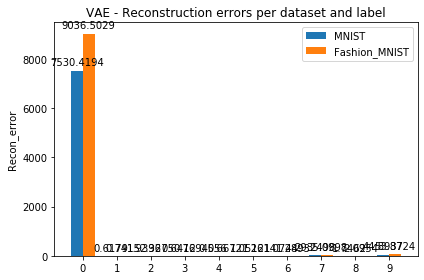

In [28]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def barcharts(average_errors1, average_errors2):
    labels = np.arange(10)
    MNIST = average_errors1
    Fashion_MNIST = average_errors2
    
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, MNIST, width, label='MNIST')
    rects2 = ax.bar(x + width/2, Fashion_MNIST, width, label='Fashion_MNIST')
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Recon_error')
    ax.set_title('VAE - Reconstruction errors per dataset and label')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    
    
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = np.around(rect.get_height(), decimals=4)
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
    
    
    autolabel(rects1)
    autolabel(rects2)
    
    fig.tight_layout()
    
    plt.show()
    
    return

barcharts(errors, errors+errors*0.2)

# experimental phase: training with incomplete knowledge to control anomaly detection capabilities.

In [ ]:
# train on partial dataset, evaluate on full data:

